In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [10]:
class ResFit():
    """Takes in input VNA scans containing a resonance in the form [freq, S21[dBm]] and returns the fit parameters."""
    def __init__(self, data):
        self.xdata = data[:, 0]
        self.ydata_dbm = data[:, 1]
        self.ydata = 10**(self.ydata_dbm / 20)
        self.fmin= self.xdata[np.argmin(self.ydata)]
        self.xdata_centered = self.xdata - self.fmin
        self.fix_fmin()

    def fix_fmin(self):
        """fmin is a parameter that depends on the input data but must not vary during fit. fix_fmin() returns the fit function with fixed fmin."""
        def fit_function(f, p0, p1, p2, p3, p4, p5, p6, p7):
            fun = abs(p5*f + p6*f**2 + p7*f**3 + p0*(1 - np.exp(1j*p3)*p1*(p1**-1 - (p2)**-1) / (1 + 2j * p1 * ( f - p4 ) / self.fmin )))
            return fun
        self.fit_function = fit_function

    def fit_resonance(self, initial_params = None):
        self.popt, self.pcov = curve_fit(self.fit_function, self.xdata_centered, self.ydata, p0 = initial_params, maxfev = int(1e6))
        print(f"Resonant frequency: {self.popt[0] + self.fmin} Hz")
        print(f"Q total: {self.popt[1]}")
        print(f"Q internal: {self.popt[2]}")
        print(f"Complex phase: {self.popt[3]}")
    
    def plot_resonance(self):
        if not self.popt[0]:
            print("you should fit before plotting")
            return
        else:
            plt.plot(self.xdata * 1e-9, self.ydata_dbm)
            plt.plot(self.xdata * 1e-9, 20*np.log10(self.fit_function(self.xdata_centered, *self.popt)))
            plt.legend(["Data", "Fit"])
            plt.ylabel("S21 [dBm]")
            plt.xlabel("Frequency [GHz]")

In [11]:
initial_params = [1, 5.1e2, 1e2, 0, -1e6, 0, 0, 0]
reso = np.loadtxt("Resonances/Resonances/20mK_-5dBm.txt")

fitter = ResFit(reso)
fitter.fit_resonance(initial_params)

Resonant frequency: 5477600000.33862 Hz
Q total: 796.042239948169
Q internal: 1137.2910112103143
Complex phase: -0.37363993883580376


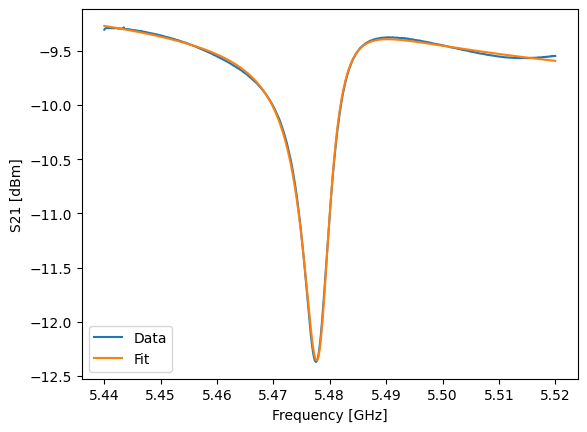

In [12]:
fitter.plot_resonance()